## Betweenness centrality of road networks
Author: Runan Duan

### 1. Introduction

**1.1 What is betweenness centrality**

Betweenness centrality is used to identify **significant nodes or edges** in a network. In its application to road networks, it could reveal **important road segments** within the network<sup>[1]</sup>.

**1.2 How to calculate betweenness centrality**

* [NetworkX](https://networkx.org/documentation/stable/index.html#) is a popular Python package that provides various methods and functions for creating, manipulating and analysing complex networks. We can easily use functions from this package to calculate the betweenness centrality for nodes and edges in the network, such as using [`betweenness_centrality`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality) and [`edge_betweenness_centrality`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality)

* In the context of road networks, we also need to consider factors such as speed limits and time-saving trips. In this case, the implementation of a geographically adapted method allows us to
    * Generate random road segments from OpenStreetMap (OSM)
    * Create a network of speed limits
    * Add other factors affecting traffic, such as destination type and population distribution.
> Readers can derive road networks and other geospatial features from OpenStreetMap using the Python package [OSMnx](https://osmnx.readthedocs.io/en/stable/) .

In [2]:
# Import packages
import osmnx as ox
from src.mypackage import mymodule1 as m
import matplotlib.pyplot as plt
ox.config(use_cache=True, log_console=True)

C:\Users\drn20\AppData\Local\Temp\ipykernel_14224\4207325499.py:5: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  ox.config(use_cache=True, log_console=True)


### 2. The Aim and the Study Areas
**2.1 The aim**

In this article we analyse differences in route centrality due to different **route types (shortest, fastest)** and **centrality measures**, namely methods provided by the networkx package and a geographically adapted method written by ourselves. 

**2.2 The study areas**

Considering that we need a relatively large data set to generate routes as well as an appropriate graph size to reduce the program running time, we choose the cities **Aachen, Göttingen and Marburg** in Germany, which have different sizes of road networks, as study areas.

**2.3 The road networks in the study areas**

In [9]:
# Define study area and route types
type1 = "shortest"
type2 = "fastest"
outf = r".\output"
method1="NetworkX"
method2="Geo-adapted"

In [4]:
study_area = "Aachen, Germany"
graph = ox.graph_from_place(study_area, network_type="drive")

In [5]:
study_area2 = "Göttingen, Germany"
graph2 = ox.graph_from_place(study_area2, network_type="drive")

In [6]:
study_area3 = "Marburg, Germany"
graph3 = ox.graph_from_place(study_area3, network_type="drive")

In [6]:
# Plot the graph
print(f"""
---------------------
{study_area}
nodes          | {len(graph.nodes)}
route segments | {len(graph.edges)}
---------------------
{study_area2}
nodes          | {len(graph2.nodes)}
route segments | {len(graph2.edges)}
---------------------
{study_area3}
nodes          | {len(graph3.nodes)}
route segments | {len(graph3.edges)}
---------------------""")


---------------------
Aachen, Germany
nodes          | 3852
route segments | 9083
---------------------
Göttingen, Germany
nodes          | 2603
route segments | 6030
---------------------
Marburg, Germany
nodes          | 2203
route segments | 5194
---------------------


### 3. Betweenness centrality based on the shortest/fastest route
In this part, we will calculate the betweenness centrality based on the shortest route and the one based on the fastest route using the `networkx` package. 

In [29]:
# Calculate based on the shortest route
obj_shortest1 = m.Networkx(study_area, graph, type1, outf)
obj_shortest1.centrality()
centrality_gdf_s1 = obj_shortest1.join_dataframe()
# Normalize centrality to plot
centrality_gdf_s1["weight"] = (centrality_gdf_s1["centrality"] - centrality_gdf_s1["centrality"].min()) / (centrality_gdf_s1["centrality"].max() - centrality_gdf_s1["centrality"].min())

In [30]:
# Calculate based on the fastest route
obj_fastest1 = m.Networkx(study_area, graph, type2, outf)
obj_fastest1.centrality()
centrality_gdf_f1 = obj_fastest1.join_dataframe()
# Normalize centrality to plot
centrality_gdf_f1["weight"] = (centrality_gdf_f1["centrality"] - centrality_gdf_f1["centrality"].min()) / (centrality_gdf_f1["centrality"].max() - centrality_gdf_f1["centrality"].min())

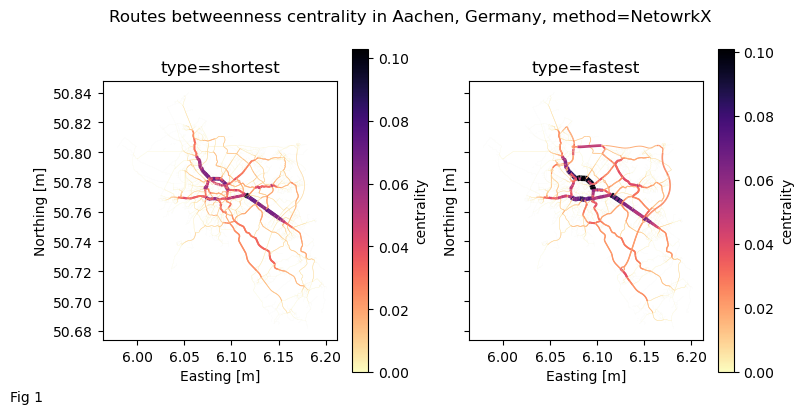

In [35]:
# Plot the figure
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
centrality_gdf_s1.plot(ax=axs[0], linewidth=centrality_gdf_s1["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
centrality_gdf_f1.plot(ax=axs[1], linewidth=centrality_gdf_f1["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
fig.suptitle(f"Routes betweenness centrality in {study_area}, method={method1}")
txt = "Fig 1"
fig.text(0, 0, txt)
axs[0].set_title(f"type={type1}")
axs[1].set_title(f"type={type2}")
for ax in axs.flat:
    ax.set(xlabel='Easting [m]', ylabel='Northing [m]')
fig.tight_layout()

In [31]:
# Calculate based on the shortest route
obj_shortest2 = m.Networkx(study_area2, graph2, type1, outf)
obj_shortest2.centrality()
centrality_gdf_s2 = obj_shortest2.join_dataframe()
# Normalize centrality to plot
centrality_gdf_s2["weight"] = (centrality_gdf_s2["centrality"] - centrality_gdf_s2["centrality"].min()) / (centrality_gdf_s2["centrality"].max() - centrality_gdf_s2["centrality"].min())

In [32]:
# Calculate based on the fastest route
obj_fastest2 = m.Networkx(study_area2, graph2, type2, outf)
obj_fastest2.centrality()
centrality_gdf_f2 = obj_fastest2.join_dataframe()
# Normalize centrality to plot
centrality_gdf_f2["weight"] = (centrality_gdf_f2["centrality"] - centrality_gdf_f2["centrality"].min()) / (centrality_gdf_f2["centrality"].max() - centrality_gdf_f2["centrality"].min())

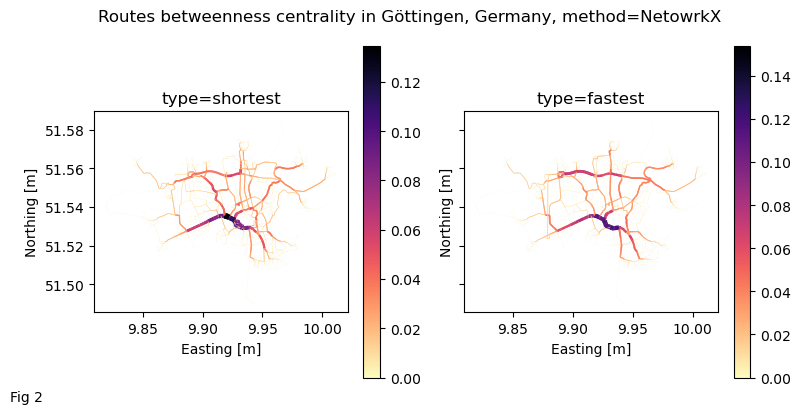

In [28]:
# Plot the figure
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
centrality_gdf_s2.plot(ax=axs[0], linewidth=centrality_gdf_s2["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
centrality_gdf_f2.plot(ax=axs[1], linewidth=centrality_gdf_f2["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
fig.suptitle(f"Routes betweenness centrality in {study_area2}, method={method1}")
txt = "Fig 2"
fig.text(0, 0, txt)
axs[0].set_title(f"type={type1}")
axs[1].set_title(f"type={type2}")
for ax in axs.flat:
    ax.set(xlabel='Easting [m]', ylabel='Northing [m]')
fig.tight_layout()

In [36]:
# Calculate based on the shortest route
obj_shortest3 = m.Networkx(study_area3, graph3, type1, outf)
obj_shortest3.centrality()
centrality_gdf_s3 = obj_shortest3.join_dataframe()
# Normalize centrality to plot
centrality_gdf_s3["weight"] = (centrality_gdf_s3["centrality"] - centrality_gdf_s3["centrality"].min()) / (centrality_gdf_s3["centrality"].max() - centrality_gdf_s3["centrality"].min())

In [37]:
# Calculate based on the fastest route
obj_fastest3 = m.Networkx(study_area3, graph3, type2, outf)
obj_fastest3.centrality()
centrality_gdf_f3 = obj_fastest3.join_dataframe()
# Normalize centrality to plot
centrality_gdf_f3["weight"] = (centrality_gdf_f3["centrality"] - centrality_gdf_f3["centrality"].min()) / (centrality_gdf_f3["centrality"].max() - centrality_gdf_f3["centrality"].min())

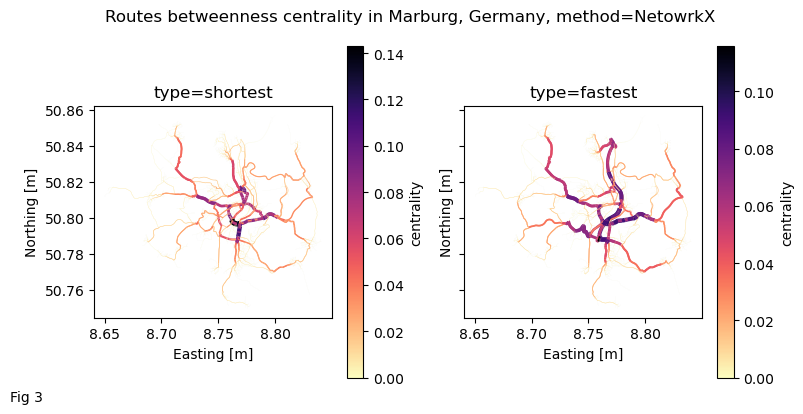

In [41]:
# Plot the figure
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
centrality_gdf_s3.plot(ax=axs[0], linewidth=centrality_gdf_s3["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
centrality_gdf_f3.plot(ax=axs[1], linewidth=centrality_gdf_f3["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
fig.suptitle(f"Routes betweenness centrality in {study_area3}, method={method1}")
txt = "Fig 3"
fig.text(0, 0, txt)
axs[0].set_title(f"type={type1}")
axs[1].set_title(f"type={type2}")
for ax in axs.flat:
    ax.set(xlabel='Easting [m]', ylabel='Northing [m]')
fig.tight_layout()

The color bar in the figures represents centrality. The centrality of routes increases as the color darkens. The line width is weighted by the normalized centrality, wide lines tend to have higher centrality values.

As we can see(Figures 1-3), the main differences between the shortest and the fastest networks are that
* **The centrality varies with the length of the route segments**: 
    * The centrality of some longer route segments tends to be higher in the fastest networks, due to the weight of speed limits.
    * The centrality of some shorter route segments tends to decrease in the fastest networks compared to the shortest networks.
* **Centrality in the fastest networks is closely related to road type**. More specifically, motorways, expressways or trunk roads can have a higher centrality than residential roads or small streets. In this sense, the fastest networks could outline the transport framework of cities. 

[Text(0.5, -1.3885555555555538, 'Easting [m]'),
 Text(297.44625224361806, 0.5, 'Northing [m]')]

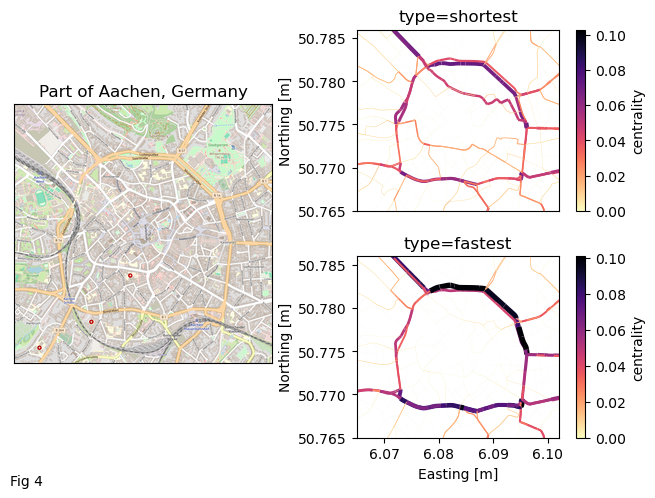

In [42]:
import tilemapbase
tilemapbase.init(create=True)
# Access to the OSM of Aachen
t = tilemapbase.tiles.build_OSM()
center = (6.083970, 50.775418)
degree_range = 0.0001
extent = tilemapbase.Extent.from_centre_lonlat(center[0], center[1], xsize=degree_range, ysize=degree_range)

# Create main and subplots
fig = plt.figure(layout="constrained")
txt = "Fig 4"
fig.text(0, 0, txt)
ax_dict = fig.subplot_mosaic(
    [
        ["main", "zoom1"],
        ["main", "zoom2"],
    ]
)
# The map of Aachen
plotter = tilemapbase.Plotter(extent, t, width=600)
plotter.plot(ax_dict["main"], t)
ax_dict["main"].xaxis.set_visible(False)
ax_dict["main"].yaxis.set_visible(False)
ax_dict["main"].set_title(f"Part of {study_area}")

# The shortest path graph
centrality_gdf_s1.plot(ax=ax_dict["zoom1"], linewidth=centrality_gdf_s1["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
ax_dict["zoom1"].set_xlim(left=6.065, right=6.102)
ax_dict["zoom1"].set_ylim(bottom=50.765, top=50.786)
ax_dict["zoom1"].get_xaxis().set_visible(False)

# The fastest path graph
centrality_gdf_f1.plot(ax=ax_dict["zoom2"], linewidth=centrality_gdf_f1["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
ax_dict["zoom2"].set_xlim(left=6.065, right=6.102)
ax_dict["zoom2"].set_ylim(bottom=50.765, top=50.786)
ax_dict["zoom1"].set_title(f"type={type1}")
ax_dict["zoom2"].set_title(f"type={type2}")
ax_dict["zoom1"].set_ylabel('Northing [m]')
ax_dict["zoom2"].set(xlabel='Easting [m]', ylabel='Northing [m]')

If we zoom in on a small part of the route network in Aachen(Figure 4), we can clearly see that the centrality of the white roads running through the city centre decreases from the shortest to the fastest network to 0.02 or even less, while the centrality of the motorways surrounding the city centre increases from 0.06 to 0.08 and 0.10.

This result actually anticipates our expectation that short roads or low speed roads tend to attract more traffic than long roads or high speed roads. From this perspective, **the fastest route type is more realistic** for identifying important road segments in the road network.

### 4. Betweenness centrality based on the geo-adapted method
Now we can try a geographically adapted way to compute the betweenness centrality. 

In [10]:
# Number of routes: 100
n1 = 100
obj_n1 = m.Geo(study_area, graph, type2, n1, outf)
obj_n1.centrality()
centrality_gdf_n1 = obj_n1.join_dataframe()
# Normalize centrality to plot
centrality_gdf_n1["weight"] = (centrality_gdf_n1["centrality"] - centrality_gdf_n1["centrality"].min()) / (centrality_gdf_n1["centrality"].max() - centrality_gdf_n1["centrality"].min())

In [11]:
# Number of routes: 500
n2 = 500
obj_n2 = m.Geo(study_area, graph, type2,n2, outf)
obj_n2.centrality()
centrality_gdf_n2 = obj_n2.join_dataframe()
# Normalize centrality to plot
centrality_gdf_n2["weight"] = (centrality_gdf_n2["centrality"] - centrality_gdf_n2["centrality"].min()) / (centrality_gdf_n2["centrality"].max() - centrality_gdf_n2["centrality"].min())

In [12]:
# Number of routes: 1000
n3 = 1000
obj_n3 = m.Geo(study_area, graph, type2, n3, outf)
obj_n3.centrality()
centrality_gdf_n3 = obj_n3.join_dataframe()
# Normalize centrality to plot
centrality_gdf_n3["weight"] = (centrality_gdf_n3["centrality"] - centrality_gdf_n3["centrality"].min()) / (centrality_gdf_n3["centrality"].max() - centrality_gdf_n3["centrality"].min())

In [13]:
# Number of routes: 1500
n4 = 1500
obj_n4 = m.Geo(study_area, graph, type2, n4, outf)
obj_n4.centrality()
centrality_gdf_n4 = obj_n4.join_dataframe()
# Normalize centrality to plot
centrality_gdf_n4["weight"] = (centrality_gdf_n4["centrality"] - centrality_gdf_n4["centrality"].min()) / (centrality_gdf_n4["centrality"].max() - centrality_gdf_n4["centrality"].min())

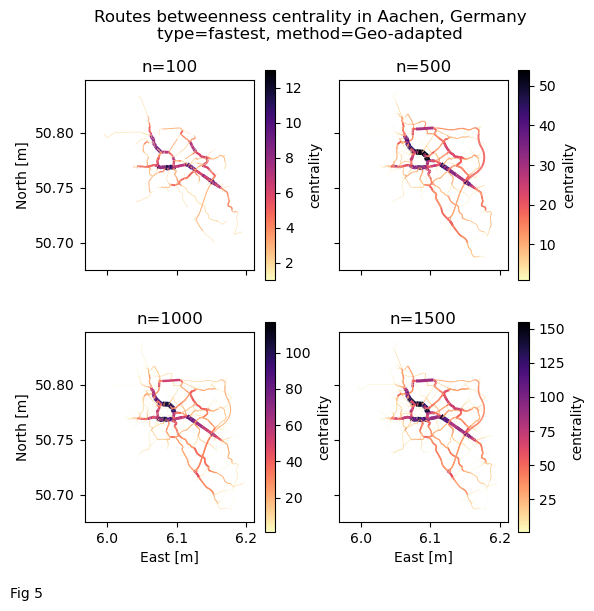

In [14]:
# Plot the figure
fig, axs = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey=True)
centrality_gdf_n1.plot(ax=axs[0, 0], linewidth=centrality_gdf_n1["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
centrality_gdf_n2.plot(ax=axs[0, 1], linewidth=centrality_gdf_n2["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
centrality_gdf_n3.plot(ax=axs[1, 0], linewidth=centrality_gdf_n3["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
centrality_gdf_n4.plot(ax=axs[1, 1], linewidth=centrality_gdf_n4["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
fig.suptitle(f"Routes betweenness centrality in {study_area}\ntype={type2}, method={method2}")
txt = "Fig 5"
fig.text(0, 0, txt)
axs[0, 0].set_title(f"n={n1}")
axs[0, 1].set_title(f"n={n2}")
axs[1, 0].set_title(f"n={n3}")
axs[1, 1].set_title(f"n={n4}")
for i in range(2):
    ax = axs[1][i]
    ax.set_xlabel('Easting [m]')
    ax = axs[i][0]
    ax.set_ylabel('Northing [m]')

In [15]:
# Number of routes: 100
obj_n1_graph2 = m.Geo(study_area2, graph2, type2, n1, outf)
obj_n1_graph2.centrality()
centrality_gdf_n1_graph2 = obj_n1_graph2.join_dataframe()
# Normalize centrality to plot
centrality_gdf_n1_graph2["weight"] = (centrality_gdf_n1_graph2["centrality"] - centrality_gdf_n1_graph2["centrality"].min()) / (centrality_gdf_n1_graph2["centrality"].max() - centrality_gdf_n1_graph2["centrality"].min())

In [16]:
# Number of routes: 500
obj_n2_graph2 = m.Geo(study_area2, graph2, type2,n2, outf)
obj_n2_graph2.centrality()
centrality_gdf_n2_graph2 = obj_n2_graph2.join_dataframe()
# Normalize centrality to plot
centrality_gdf_n2_graph2["weight"] = (centrality_gdf_n2_graph2["centrality"] - centrality_gdf_n2_graph2["centrality"].min()) / (centrality_gdf_n2_graph2["centrality"].max() - centrality_gdf_n2_graph2["centrality"].min())

In [17]:
# Number of routes: 1000
obj_n3_graph2 = m.Geo(study_area2, graph2, type2, n3, outf)
obj_n3_graph2.centrality()
centrality_gdf_n3_graph2 = obj_n3_graph2.join_dataframe()
# Normalize centrality to plot
centrality_gdf_n3_graph2["weight"] = (centrality_gdf_n3_graph2["centrality"] - centrality_gdf_n3_graph2["centrality"].min()) / (centrality_gdf_n3_graph2["centrality"].max() - centrality_gdf_n3_graph2["centrality"].min())

In [22]:
# Number of routes: 1500
obj_n4_graph2 = m.Geo(study_area2, graph2, type2, n4, outf)
obj_n4_graph2.centrality()
centrality_gdf_n4_graph2 = obj_n4_graph2.join_dataframe()
# Normalize centrality to plot
centrality_gdf_n4_graph2["weight"] = (centrality_gdf_n4_graph2["centrality"] - centrality_gdf_n4_graph2["centrality"].min()) / (centrality_gdf_n4_graph2["centrality"].max() - centrality_gdf_n4_graph2["centrality"].min())

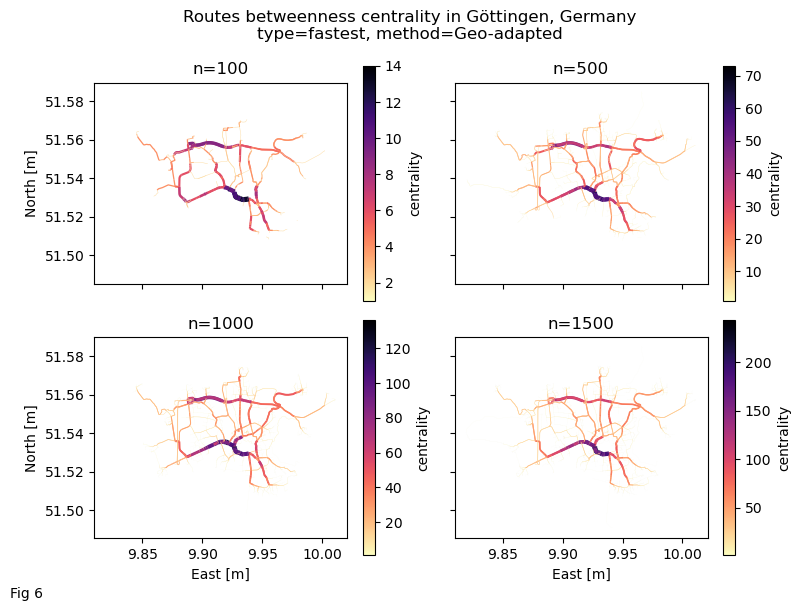

In [25]:
# Plot the figure
fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)
centrality_gdf_n1_graph2.plot(ax=axs[0, 0], linewidth=centrality_gdf_n1_graph2["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
centrality_gdf_n2_graph2.plot(ax=axs[0, 1], linewidth=centrality_gdf_n2_graph2["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
centrality_gdf_n3_graph2.plot(ax=axs[1, 0], linewidth=centrality_gdf_n3_graph2["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
centrality_gdf_n4_graph2.plot(ax=axs[1, 1], linewidth=centrality_gdf_n4_graph2["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
fig.suptitle(f"Routes betweenness centrality in {study_area2}\ntype={type2}, method={method2}")
txt = "Fig 6"
fig.text(0, 0, txt)
axs[0, 0].set_title(f"n={n1}")
axs[0, 1].set_title(f"n={n2}")
axs[1, 0].set_title(f"n={n3}")
axs[1, 1].set_title(f"n={n4}")
for i in range(2):
    ax = axs[1][i]
    ax.set_xlabel('Easting [m]')
    ax = axs[i][0]
    ax.set_ylabel('Northing [m]')
fig.tight_layout()

In [18]:
# Number of routes: 100
obj_n1_graph3 = m.Geo(study_area3, graph3, type2, n1, outf)
obj_n1_graph3.centrality()
centrality_gdf_n1_graph3 = obj_n1_graph3.join_dataframe()
# Normalize centrality to plot
centrality_gdf_n1_graph3["weight"] = (centrality_gdf_n1_graph3["centrality"] - centrality_gdf_n1_graph3["centrality"].min()) / (centrality_gdf_n1_graph3["centrality"].max() - centrality_gdf_n1_graph3["centrality"].min())

In [19]:
# Number of routes: 500
obj_n2_graph3 = m.Geo(study_area3, graph3, type2,n2, outf)
obj_n2_graph3.centrality()
centrality_gdf_n2_graph3 = obj_n2_graph3.join_dataframe()
# Normalize centrality to plot
centrality_gdf_n2_graph3["weight"] = (centrality_gdf_n2_graph3["centrality"] - centrality_gdf_n2_graph3["centrality"].min()) / (centrality_gdf_n2_graph3["centrality"].max() - centrality_gdf_n2_graph3["centrality"].min())

In [20]:
# Number of routes: 1000
obj_n3_graph3 = m.Geo(study_area3, graph3, type2, n3, outf)
obj_n3_graph3.centrality()
centrality_gdf_n3_graph3 = obj_n3_graph3.join_dataframe()
# Normalize centrality to plot
centrality_gdf_n3_graph3["weight"] = (centrality_gdf_n3_graph3["centrality"] - centrality_gdf_n3_graph3["centrality"].min()) / (centrality_gdf_n3_graph3["centrality"].max() - centrality_gdf_n3_graph3["centrality"].min())

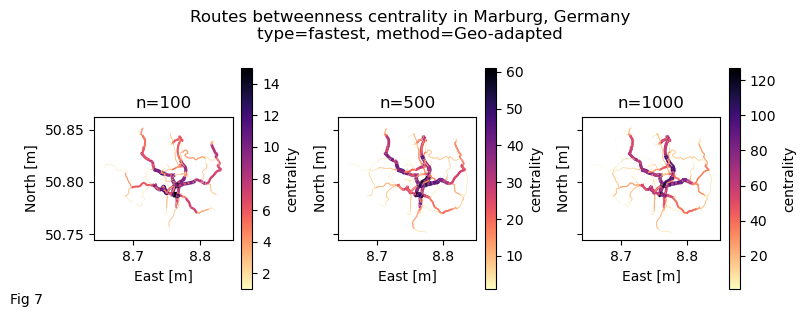

In [27]:
# Plot the figure
fig, axs = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
centrality_gdf_n1_graph3.plot(ax=axs[0], linewidth=centrality_gdf_n1_graph3["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
centrality_gdf_n2_graph3.plot(ax=axs[1], linewidth=centrality_gdf_n2_graph3["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
centrality_gdf_n3_graph3.plot(ax=axs[2], linewidth=centrality_gdf_n3_graph3["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
fig.suptitle(f"Routes betweenness centrality in {study_area3}\ntype={type2}, method={method2}")
txt = "Fig 7"
fig.text(0, 0, txt)
axs[0].set_title(f"n={n1}")
axs[1].set_title(f"n={n2}")
axs[2].set_title(f"n={n3}")
for i in range(3):
    ax = axs[i]
    ax.set_xlabel('Easting [m]')
    ax.set_ylabel('Northing [m]')
fig.tight_layout()

Even though all routes are randomly selected(Figures 5-7), we can still find that 
* **As the number of routes increases, the centrality of all roads in the study areas increases**. In particular, the centrality of the main roads running through the city center and connecting to nearby towns or other cities increases 100-fold as the number of routes increases from 100 to 1000, while other roads increase only 10-fold.
* **Geographical location plays an important role in the network**, although the shape and size of road networks vary from city to city, but the roads in the center place tend to have higher centrality than roads in the periphery.
* **The temporal evolution of betweenness centrality in cities** needs to be considered<sup>[2]</sup>. As a city expands and refines its infrastructure, the previous roads, which tend to be the main roads in the city, increase their connectivity with new bulit roads.

### 4. Difference between two methods
If we compare the centrality index with the one computed by the function `networkx.edge_betweenness_centrality` from the networkx package, which computes the betweenness centrality is computed by the shortest paths in the network, we can see that 
* The centrality of the routes computed by NetworkX is around 0.10(Figures 8-10), and the values vary slightly from different road networks.
* While the Geo-adapted method counts the occurence of route segments between nodes, so the value increases as the networks expand. As we can see from Figures 5-7, the centrality of main roads increases rapidly as the number of routes in networks increases.

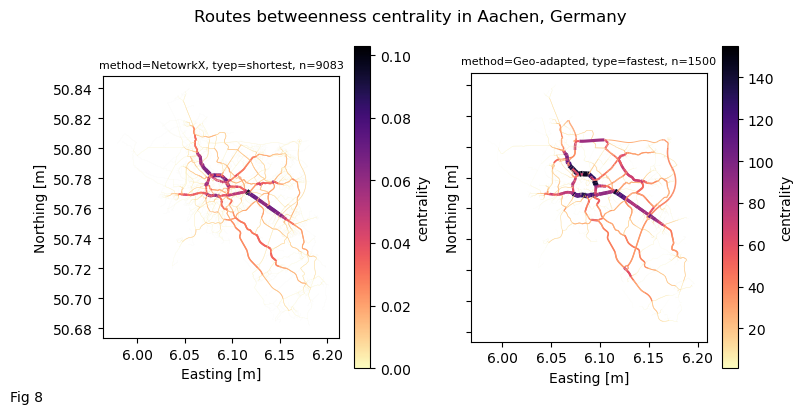

In [46]:
# Plot the figure
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
centrality_gdf_s1.plot(ax=axs[0], linewidth=centrality_gdf_s1["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
centrality_gdf_n4.plot(ax=axs[1], linewidth=centrality_gdf_n4["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
fig.suptitle(f"Routes betweenness centrality in {study_area}")
txt = "Fig 8"
fig.text(0, 0, txt)
axs[0].set_title(f"method={method1}, tyep={type1}, n={len(graph.edges)}", fontsize=8)
axs[1].set_title(f"method={method2}, type={type2}, n={n4}", fontsize=8)
for ax in axs.flat:
    ax.set(xlabel='Easting [m]', ylabel='Northing [m]')
fig.tight_layout()

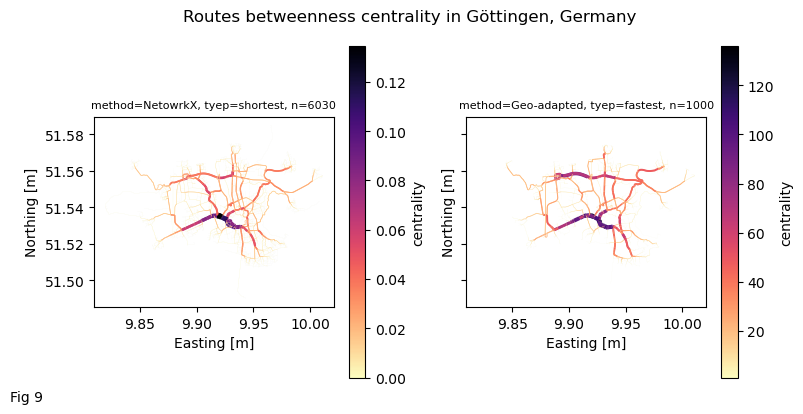

In [47]:
# Plot the figure
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
centrality_gdf_s2.plot(ax=axs[0], linewidth=centrality_gdf_s2["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
centrality_gdf_n3_graph2.plot(ax=axs[1], linewidth=centrality_gdf_n3_graph2["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
fig.suptitle(f"Routes betweenness centrality in {study_area2}")
txt = "Fig 9"
fig.text(0, 0, txt)
axs[0].set_title(f"method={method1}, tyep={type1}, n={len(graph2.edges)}", fontsize=8)
axs[1].set_title(f"method={method2}, tyep={type2}, n={n3}", fontsize=8)
for ax in axs.flat:
    ax.set(xlabel='Easting [m]', ylabel='Northing [m]')
fig.tight_layout()

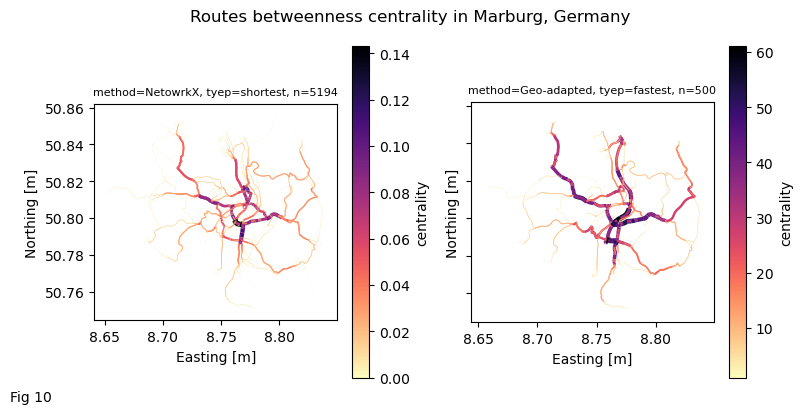

In [48]:
# Plot the figure
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
centrality_gdf_s3.plot(ax=axs[0], linewidth=centrality_gdf_s3["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
centrality_gdf_n2_graph3.plot(ax=axs[1], linewidth=centrality_gdf_n2_graph3["weight"] * 4, column="centrality", cmap='magma_r', legend=True, legend_kwds={"label": "centrality"})
fig.suptitle(f"Routes betweenness centrality in {study_area3}")
txt = "Fig 10"
fig.text(0, 0, txt)
axs[0].set_title(f"method={method1}, tyep={type1}, n={len(graph3.edges)}", fontsize=8)
axs[1].set_title(f"method={method2}, tyep={type2}, n={n2}", fontsize=8)
for ax in axs.flat:
    ax.set(xlabel='Easting [m]', ylabel='Northing [m]')
fig.tight_layout()

#### References
1. Ludwig, C., Psotta, J., Buch, A., Kolaxidis, N., Fendrich, S., Zia, M., Fürle, J., Rousell, A., and Zipf, A.: TRAFFIC SPEED MODELLING TO IMPROVE TRAVEL TIME ESTIMATION IN OPENROUTESERVICE, Int. Arch. Photogramm. Remote Sens. Spatial Inf. Sci., XLVIII-4/W7-2023, 109–116, https://doi.org/10.5194/isprs-archives-XLVIII-4-W7-2023-109-2023, 2023.
2. Kirkley, A., Barbosa, H., Barthelemy, M. et al. From the betweenness centrality in street networks to structural invariants in random planar graphs. Nat Commun 9, 2501 (2018). https://doi.org/10.1038/s41467-018-04978-z